In [1]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary
import matplotlib.pyplot as plt

from generate_data import generate_hiv_data, generate_discrete_hiv_data
from decimal import Decimal

In [12]:
T = 1e-1
t = np.linspace(0, 100, 1001)
x0 = [1, 1, 1, 1, 1]
x0_val = [11/20, 10/3, 0.05, 0.0835-0.05, 0.05]

u = lambda t: 0.1*np.sin(t)
# u_val = lambda t: 533/1078 + 0*t
u_val = lambda t: 0.1*np.cos(2*t)

x, x_dot = generate_hiv_data(t=t, x0=x0, u=u)
x_val, _ = generate_hiv_data(t=t, x0=x0_val, u=u_val)

xk = generate_discrete_hiv_data(t=t, x0=x0, T=T, u=u(t))
xk_val = generate_discrete_hiv_data(t=t, x0=x0_val, T=T, u=u_val(t))

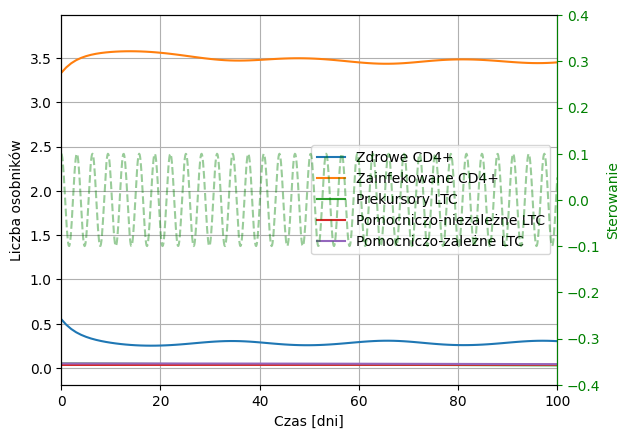

In [13]:
plt.plot(x_val[:, 0])
plt.plot(x_val[:, 1])
plt.plot(x_val[:, 2])
plt.plot(x_val[:, 3])
plt.plot(x_val[:, 4])
plt.grid()
plt.legend(["Zdrowe CD4+", "Zainfekowane CD4+", "Prekursory LTC", "Pomocniczo-niezależne LTC", "Pomocniczo-zależne LTC"])
plt.xlim(0, max(t))
plt.xlabel("Czas [dni]")
ax1 = plt.gca()
ax2 = ax1.twinx()
# ax1.set_ylim(0, 20)
ax2.spines['right'].set_color('green')
ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')
ax2.plot(t, u_val(t), 'g--', alpha=0.4)
ax2.set_ylabel("Sterowanie")
ax2.set_ylim(-0.4, 0.4)
ax1.set_ylabel("Liczba osobników")
ax2.set_ylabel("Sterowanie")
plt.show()

In [14]:
model = ps.SINDy(
    feature_library=PolynomialLibrary(degree=3), # 2, 1
    # feature_library=FourierLibrary(n_frequencies=1), # 2, 1
    optimizer=ps.STLSQ(threshold=1e-4), # 0.001, 0.01, 0.1
    feature_names=[f'x{i+1}' for i in range(len(x[0]))]+['u'],
    discrete_time=True)
model.fit(x=xk, u=u(t))
model.print()

(x1)[k+1] = 0.100 1 + 0.990 x1[k] + -0.100 x1[k] x2[k] + 0.098 x1[k] x2[k] u[k]
(x2)[k+1] = 0.980 x2[k] + 0.100 x1[k] x2[k] + -0.100 x2[k] x4[k] + -0.100 x2[k] x5[k] + -0.098 x1[k] x2[k] u[k]
(x3)[k+1] = 0.999 x3[k] + -0.003 x2[k] x3[k] + 0.006 x1[k] x2[k] x3[k]
(x4)[k+1] = 0.990 x4[k] + 0.003 x2[k] x4[k]
(x5)[k+1] = 0.990 x5[k] + 0.003 x2[k] x3[k]


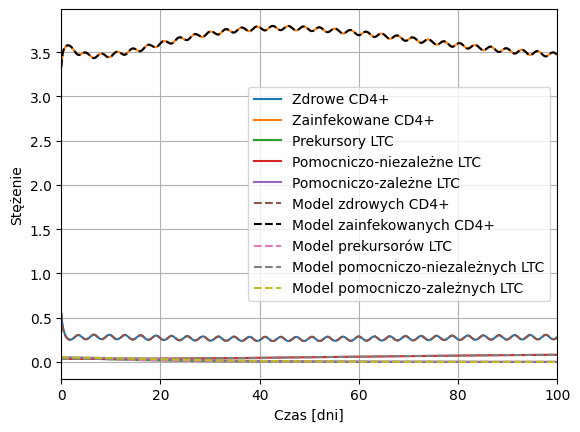

In [21]:
plt.plot(t, x_val[:, 0])
plt.plot(t, x_val[:, 1])
plt.plot(t, x_val[:, 2])
plt.plot(t, x_val[:, 3])
plt.plot(t, x_val[:, 4])
x_sim = model.simulate(x0=x0_val, t=1001, u=u_val(t))

plt.plot(t, x_sim[:, 0], linestyle='--')
plt.plot(t, x_sim[:, 1], 'k--')
plt.plot(t, x_sim[:, 2], linestyle='--')
plt.plot(t, x_sim[:, 3], linestyle='--')
plt.plot(t, x_sim[:, 4], linestyle='--')
plt.grid()
plt.legend(["Zdrowe CD4+", "Zainfekowane CD4+", "Prekursory LTC", "Pomocniczo-niezależne LTC", "Pomocniczo-zależne LTC",
            "Model zdrowych CD4+", "Model zainfekowanych CD4+", "Model prekursorów LTC", "Model pomocniczo-niezależnych LTC", "Model pomocniczo-zależnych LTC"])
plt.xlim(0, max(t))
plt.xlabel("Czas [dni]")
plt.ylabel("Stężenie")
plt.show()

In [15]:
# for x_num in range(len(x0)):
#     q = 'Biblioteka funkcji & Próg & $\Dot{x}'
#     print(f'{q}_{x_num+1}$ & $E_{x_num+1}$ \\\\')
#     for i, library in enumerate([FourierLibrary(n_frequencies=2), FourierLibrary(n_frequencies=1), PolynomialLibrary(degree=3), PolynomialLibrary(degree=2), PolynomialLibrary(degree=1)]):
#         print(f'\\hline')
#         for threshold in range(3):
#             threshold = 10**(threshold-4) if i >= 2 else 100*10**(threshold-4)
#             threshold = T * threshold
#             name = ['Trygonometryczna (st. 2)', 'Trygonometryczna (st. 1)', 'Wielomiany (st. 3)', 'Wielomiany (st. 2)', 'Liniowa']
#             model = ps.SINDy(
#                 feature_library=library,
#                 optimizer=ps.STLSQ(threshold=threshold),
#                 feature_names=[f'x{i+1}' for i in range(len(x0))]+['u'],
#                 discrete_time=True
#                 )
#             model.fit(x=xk, u=u(t))
#             try:
#                 x_sim = model.simulate(x0=x0_val, t=1001, u=u_val(t))
#                 mse = ((x_sim - xk_val)**2).mean(axis=0)
#                 E = '%.3E' % Decimal(str(mse[x_num]))
#             except:
#                 E = '\infty'
#             coeffs = ' + '.join(['%.3E' % Decimal(str(coeff))+' '+model.get_feature_names()[i] for i, coeff in enumerate(model.coefficients()[x_num]) if abs(model.coefficients()[x_num][i]) > threshold])
#             if len(coeffs.split(' + ')) > 2:
#                 eq = (coeffs.split(' + ')[0] + ' + ' + coeffs.split(' + ')[1] + '\dots').replace(' 1 +', ' +')
#             else:
#                 eq = coeffs
#             if len(coeffs) == 0:
#                 eq = '0,000'
#             eq = eq.replace(' 1 +', ' +').replace('.', ',').replace('+ -', '- ').replace('sin', '\sin').replace('cos', '\cos').replace('(1 x1)', '(x_1)').replace('(1 x2)', '(x_2)').replace('x2', 'x_2').replace('(1 x3)', '(x_3)').replace('x3', 'x_3').replace('(1 x4)', '(x_4)').replace('x4', 'x_4').replace('(1 x5)', '(x_5)').replace('x5', 'x_5').replace('x1', 'x_1').replace('(1 u)', '(u)')
#             for pow in range(1, 10):
#                 eq = eq.replace('E+00', '')
#                 E = E.replace('E+00', '')
#                 eq = eq.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#                 E = E.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#             print(f"{name[i]} & {(str(threshold).replace('.', ',') + ' &').replace(',0 &', ' &')} ${eq}$ & ${E.replace('.', ',')}$ \\\\")
#     print('\n\n')